## Load SAM model

In [9]:
import torch
from segment_anything import sam_model_registry, SamPredictor,SamAutomaticMaskGenerator
device='cuda' if torch.cuda.is_available() else 'cpu'
sam = sam_model_registry["default"](checkpoint="model/sam_vit_h_4b8939.pth") # defaults to vit_h
sam.to(device=device)
mask_generator=SamAutomaticMaskGenerator(sam)

## Load image

(473, 710, 3)


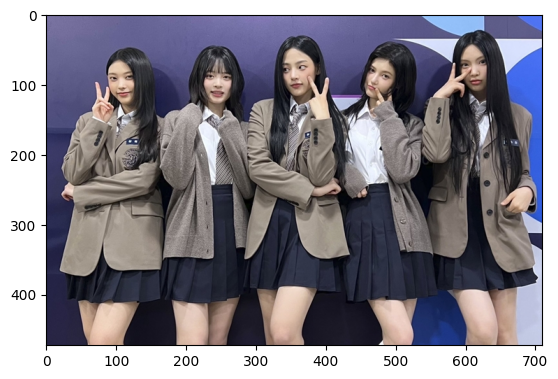

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('test.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [11]:
predictor = SamPredictor(sam)
predictor.set_image(img)
# masks, _, _ = predictor.predict(<input_prompts>)
masks=mask_generator.generate(img)

In [12]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

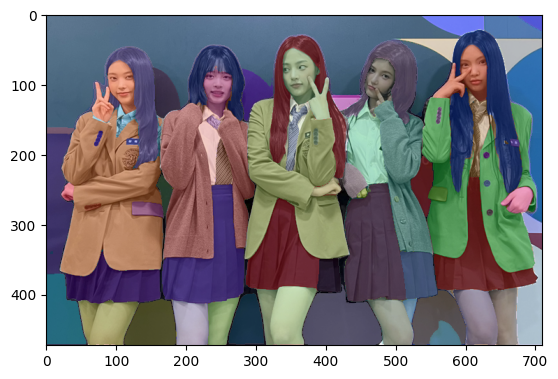

In [13]:
plt.imshow(img)
show_anns(masks)